## Cotacao de Valores 
Este relatório tem como objetivo analisar as variações de cotação de compra e venda das moedas estrangeiras USD e EUR com base em dados diários fornecidos pela PTAX (Banco Central do Brasil). As análises consideram máximos e mínimos semanais, além de padrões temporais e características estatísticas relevantes.

Cotação de Compra(Fonte: PTAX)

Cotação de Venda(Fonte: PTAX)

Paridade de Compra(Fonte: PTAX)

Paridade de Venda(Fonte: PTAX)

Instrumento de periocidade diaria


| Nome                  | Tipo     | Título                  | Descrição                                                                                               |
|-----------------------|----------|--------------------------|----------------------------------------------------------------------------------------------------------|
| cotacaoCompra         | decimal  | Cotação de compra        | Cotação de compra da moeda estrangeira contra a unidade monetária corrente (ex: BRL/USD).               |
| cotacaoVenda          | decimal  | Cotação de venda         | Cotação de venda da moeda estrangeira contra a unidade monetária corrente (ex: BRL/USD).                |
| paridadeCompra        | decimal  | Paridade de compra       | Relação de paridade de compra entre o dólar americano e a moeda consultada (ex: USD/EUR).               |
| paridadeVenda         | decimal  | Paridade de venda        | Relação de paridade de venda entre o dólar americano e a moeda consultada (ex: USD/EUR).                |
| dataHoraCotacao       | texto    | Data e hora da cotação   | Data, hora e minuto da publicação da cotação.                                                           |
| tipoBoletim           | texto    | Tipo de boletim          | Tipo de cotação informada pelo Banco Central (ex: Fechamento, Abertura, Intermediária, etc.).           |
                               




In [3]:
import pandas as pd

df = pd.read_csv("src/datasets/dolar.csv", sep=";", decimal=",") 
df


,Unnamed: 0,dataHoraCotacao,tipoBoletim,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR,paridadeCompra_USDEUR,paridadeVenda_USDEUR
0,0,2023-01-02 13:05:57.593,Fechamento,5.343,5.3436,5.6951,5.6979,1.0659,1.0663
1,1,2023-01-03 13:11:19.08,Fechamento,5.3753,5.3759,5.6726,5.6743,1.0553,1.0555
2,2,2023-01-04 13:09:19.572,Fechamento,5.4453,5.4459,5.7737,5.7748,1.0603,1.0604
3,3,2023-01-05 13:03:32.262,Fechamento,5.402,5.4026,5.6813,5.6841,1.0517,1.0521
4,4,2023-01-06 13:02:28.727,Fechamento,5.2849,5.2855,5.6031,5.6047,1.0602,1.0604
...,...,...,...,...,...,...,...,...,...
609,609,2025-06-06 13:08:48.677,Fechamento,5.5941,5.5947,6.3745,6.3763,1.1395,1.1397
610,610,2025-06-09 13:04:44.493,Fechamento,5.5754,5.576,6.3693,6.3706,1.1424,1.1425
611,611,2025-06-10 13:08:31.722,Fechamento,5.5551,5.5557,6.345,6.3468,1.1422,1.1424
612,612,2025-06-11 13:04:46.07,Fechamento,5.5384,5.539,6.3631,6.3643,1.1489,1.149


Explorando a estrutura do codigo.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             614 non-null    int64 
 1   dataHoraCotacao        614 non-null    object
 2   tipoBoletim            614 non-null    object
 3   cotacaoCompra_USD      614 non-null    object
 4   cotacaoVenda_USD       614 non-null    object
 5   cotacaoCompra_EUR      614 non-null    object
 6   cotacaoVenda_EUR       614 non-null    object
 7   paridadeCompra_USDEUR  614 non-null    object
 8   paridadeVenda_USDEUR   614 non-null    object
dtypes: int64(1), object(8)
memory usage: 43.3+ KB


Procurando por valores nulos

In [5]:
df.isnull().sum()

Unnamed: 0               0
dataHoraCotacao          0
tipoBoletim              0
cotacaoCompra_USD        0
cotacaoVenda_USD         0
cotacaoCompra_EUR        0
cotacaoVenda_EUR         0
paridadeCompra_USDEUR    0
paridadeVenda_USDEUR     0
dtype: int64

Percebemos que não existe nenhum valor nulo nessa tabela.

Descobrindo como o tipo data foi classificado

In [6]:
type(df['dataHoraCotacao'][0])

str

Agora vamos passar a data que esta como string para Date

In [7]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'])
df['dataHoraCotacao'] = df['dataHoraCotacao'].dt.date

In [8]:
type(df['dataHoraCotacao'][0])

datetime.date

Ajustando a coluna de valores

In [9]:
colunas = [
    "cotacaoCompra_USD",    
    "cotacaoVenda_USD",
    "cotacaoCompra_EUR",
    "cotacaoVenda_EUR",         
    "paridadeCompra_USDEUR",
    "paridadeVenda_USDEUR"
]

df[colunas] = df[colunas].apply(pd.to_numeric, errors='coerce')
df[colunas] = df[colunas].round(2)



In [10]:
df

,Unnamed: 0,dataHoraCotacao,tipoBoletim,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR,paridadeCompra_USDEUR,paridadeVenda_USDEUR
0,0,2023-01-02,Fechamento,5.34,5.34,5.70,5.70,1.07,1.07
1,1,2023-01-03,Fechamento,5.38,5.38,5.67,5.67,1.06,1.06
2,2,2023-01-04,Fechamento,5.45,5.45,5.77,5.77,1.06,1.06
3,3,2023-01-05,Fechamento,5.40,5.40,5.68,5.68,1.05,1.05
4,4,2023-01-06,Fechamento,5.28,5.29,5.60,5.60,1.06,1.06
...,...,...,...,...,...,...,...,...,...
609,609,2025-06-06,Fechamento,5.59,5.59,6.37,6.38,1.14,1.14
610,610,2025-06-09,Fechamento,5.58,5.58,6.37,6.37,1.14,1.14
611,611,2025-06-10,Fechamento,5.56,5.56,6.34,6.35,1.14,1.14
612,612,2025-06-11,Fechamento,5.54,5.54,6.36,6.36,1.15,1.15


Aqui analisamos no periodo de 3 anos todos os meses, com e qual foi a maxima do valor de dolar e euro

In [11]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['ano_mes'] = df['dataHoraCotacao'].dt.to_period('M')
#Aqui ele pega o ano e o mes com maior cotação
maximaDoDolarPorMes = df.groupby('ano_mes')['cotacaoVenda_USD'].max().reset_index()
maximoDoEUROPorMes = df.groupby('ano_mes')['cotacaoVenda_EUR'].max().reset_index()

## Aqui ele faz a comparação absoluta
mesUSD = maximaDoDolarPorMes[maximaDoDolarPorMes['cotacaoVenda_USD'] == maximaDoDolarPorMes['cotacaoVenda_USD'].max()]
mesEUR = maximoDoEUROPorMes[maximoDoEUROPorMes['cotacaoVenda_EUR'] == maximoDoEUROPorMes['cotacaoVenda_EUR'].max()]


# print("Mês com maior cotação de venda do Dólar (USD):")
# print(maximaDoDolarPorMes)

print("\nMês com maior cotação de venda do Euro (EUR):")
print(maximoDoEUROPorMes)






Mês com maior cotação de venda do Euro (EUR):
    ano_mes  cotacaoVenda_EUR
0   2023-01              5.77
1   2023-02              5.63
2   2023-03              5.73
3   2023-04              5.59
4   2023-05              5.55
5   2023-06              5.41
6   2023-07              5.43
7   2023-08              5.44
8   2023-09              5.34
9   2023-10              5.50
10  2023-11              5.39
11  2023-12              5.39
12  2024-01              5.39
13  2024-02              5.41
14  2024-03              5.47
15  2024-04              5.60
16  2024-05              5.69
17  2024-06              5.95
18  2024-07              6.13
19  2024-08              6.32
20  2024-09              6.25
21  2024-10              6.28
22  2024-11              6.39
23  2024-12              6.48
24  2025-01              6.38
25  2025-02              6.08
26  2025-03              6.38
27  2025-04              6.69
28  2025-05              6.51
29  2025-06              6.51


Maxima do Dolar nos meses

In [12]:
print("\nMês com maior cotação de venda do Dolar (USD):")
maximaDoDolarPorMes


Mês com maior cotação de venda do Dolar (USD):


,ano_mes,cotacaoVenda_USD
0,2023-01,5.45
1,2023-02,5.25
2,2023-03,5.30
3,2023-04,5.08
4,2023-05,5.10
5,2023-06,5.04
6,2023-07,4.90
7,2023-08,4.98
8,2023-09,5.05
9,2023-10,5.19


Aqui fazemos a media mensal dos meses durante os 3 anos de presidencia

In [13]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['ano_mes'] = df['dataHoraCotacao'].dt.to_period('M')

mediaMensal = df.groupby('ano_mes')[[
    'cotacaoCompra_USD', 'cotacaoVenda_USD',
    'cotacaoCompra_EUR', 'cotacaoVenda_EUR'
]].mean().round(2).reset_index()



print("Medial mensal:")
mediaMensal


Medial mensal:


,ano_mes,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR
0,2023-01,5.20,5.20,5.60,5.60
1,2023-02,5.17,5.17,5.54,5.54
2,2023-03,5.21,5.21,5.58,5.58
3,2023-04,5.02,5.02,5.50,5.50
4,2023-05,4.98,4.98,5.41,5.41
5,2023-06,4.85,4.85,5.26,5.26
6,2023-07,4.80,4.80,5.31,5.31
7,2023-08,4.90,4.90,5.35,5.35
8,2023-09,4.94,4.94,5.27,5.27
9,2023-10,5.07,5.07,5.35,5.35


Max de valores por trismetre na cotação de venda do dolar e do euro

In [14]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['trimestre'] = df['dataHoraCotacao'].dt.to_period('Q')

maximaDoDolarPorTrismestre = df.groupby('trimestre')['cotacaoVenda_USD'].max().reset_index()
maximoDoEUROPorTrismestre = df.groupby('trimestre')['cotacaoVenda_EUR'].max().reset_index()



print("Mes com maior cotação de venda do Dolar (USD):")
print(maximaDoDolarPorTrismestre)

print("\nMês com maior cotação de venda do Euro (EUR):")
print(maximoDoEUROPorTrismestre)

Mes com maior cotação de venda do Dolar (USD):
  trimestre  cotacaoVenda_USD
0    2023Q1              5.45
1    2023Q2              5.10
2    2023Q3              5.05
3    2023Q4              5.19
4    2024Q1              5.04
5    2024Q2              5.56
6    2024Q3              5.76
7    2024Q4              6.20
8    2025Q1              6.21
9    2025Q2              6.06

Mês com maior cotação de venda do Euro (EUR):
  trimestre  cotacaoVenda_EUR
0    2023Q1              5.77
1    2023Q2              5.59
2    2023Q3              5.44
3    2023Q4              5.50
4    2024Q1              5.47
5    2024Q2              5.95
6    2024Q3              6.32
7    2024Q4              6.48
8    2025Q1              6.38
9    2025Q2              6.69


Aqui fizemos a maxima  da cotaçao de venda por semana do euro e dolar

In [16]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['semana'] = df['dataHoraCotacao'].dt.to_period('W').apply(lambda r: r.start_time)
#Aqui ele pega o ano e o mes com maior cotação
maxSemanal = df.groupby('semana')[[
    'cotacaoVenda_USD', 'cotacaoVenda_EUR'
]].max().add_suffix('_max').round(2).reset_index()



print("Maxima semanal:")
maxSemanal

Maxima semanal:


,semana,cotacaoVenda_USD_max,cotacaoVenda_EUR_max
0,2023-01-02,5.45,5.77
1,2023-01-09,5.30,5.69
2,2023-01-16,5.21,5.63
3,2023-01-23,5.19,5.64
4,2023-01-30,5.10,5.54
...,...,...,...
123,2025-05-12,5.69,6.34
124,2025-05-19,5.69,6.46
125,2025-05-26,5.71,6.48
126,2025-06-02,5.69,6.51


Aqui trabalhamos com a cotação minima de venda por semana do euro e dolar

In [17]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['semana'] = df['dataHoraCotacao'].dt.to_period('W').apply(lambda r: r.start_time)
#Aqui ele pega o ano e o mes com maior cotação
minSemanal = df.groupby('semana')[[
    'cotacaoVenda_USD', 'cotacaoVenda_EUR'
]].min().add_suffix('_min').round(2).reset_index()



print("Minima semanal:")
minSemanal

Minima semanal:


,semana,cotacaoVenda_USD_min,cotacaoVenda_EUR_min
0,2023-01-02,5.29,5.60
1,2023-01-09,5.11,5.54
2,2023-01-16,5.09,5.52
3,2023-01-23,5.08,5.50
4,2023-01-30,4.99,5.46
...,...,...,...
123,2025-05-12,5.61,6.29
124,2025-05-19,5.64,6.36
125,2025-05-26,5.65,6.40
126,2025-06-02,5.59,6.38


Juntamos as 2 tabelas de maxima semanal e minimal semana para posterior criação de grafico

In [18]:
semana_df = pd.concat([maxSemanal, minSemanal], axis=1).reset_index()

Aqui fizemos a media da cotaçao de compra e venda de euro e dolar por semana

In [19]:
df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'], errors='coerce')

df['ano_semana'] = df['dataHoraCotacao'].dt.to_period('W')
#Aqui ele pega o ano e semana com maior semana
mediaSemanal = df.groupby('ano_semana')[[
    'cotacaoCompra_USD', 'cotacaoVenda_USD',
    'cotacaoCompra_EUR', 'cotacaoVenda_EUR',
    
]].mean().round(2).reset_index()



print("Media semanal:")
mediaSemanal

Media semanal:


,ano_semana,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR
0,2023-01-02/2023-01-08,5.37,5.37,5.68,5.68
1,2023-01-09/2023-01-15,5.20,5.20,5.60,5.60
2,2023-01-16/2023-01-22,5.15,5.15,5.57,5.57
3,2023-01-23/2023-01-29,5.13,5.13,5.57,5.57
4,2023-01-30/2023-02-05,5.07,5.07,5.52,5.52
...,...,...,...,...,...
123,2025-05-12/2025-05-18,5.65,5.65,6.31,6.31
124,2025-05-19/2025-05-25,5.66,5.66,6.39,6.39
125,2025-05-26/2025-06-01,5.67,5.67,6.43,6.44
126,2025-06-02/2025-06-08,5.64,5.64,6.43,6.44


Aqui trabalhamos com o desvio padrão, media e variação anual   do dolar e euro durante os 3 anos

In [20]:

df['dataHoraCotacao'] = pd.to_datetime(df['dataHoraCotacao'])


df['ano'] = df['dataHoraCotacao'].dt.to_period('Y')


desvioAnual = df.groupby('ano')[[
    'cotacaoCompra_USD', 'cotacaoVenda_USD',
    'cotacaoCompra_EUR', 'cotacaoVenda_EUR'
]].std().reset_index()
mediaAnual = df.groupby('ano')[[
    'cotacaoCompra_USD', 'cotacaoVenda_USD',
    'cotacaoCompra_EUR', 'cotacaoVenda_EUR'
]].mean().reset_index()
variacaoAnual = df.groupby('ano')[[
    'cotacaoCompra_USD', 'cotacaoVenda_USD',
    'cotacaoCompra_EUR', 'cotacaoVenda_EUR'
]].var().reset_index()



In [21]:
desvioAnual



,ano,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR
0,2023,0.148767,0.148527,0.132193,0.132013
1,2024,0.360085,0.359997,0.363102,0.363119
2,2025,0.150983,0.150878,0.182329,0.182913


In [22]:
mediaAnual

,ano,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR
0,2023,4.994739,4.995462,5.400241,5.402450
1,2024,5.391462,5.391897,5.832411,5.834150
2,2025,5.783482,5.783750,6.282143,6.284196


In [23]:
variacaoAnual

,ano,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR
0,2023,0.022131,0.022060,0.017475,0.017427
1,2024,0.129661,0.129598,0.131843,0.131855
2,2025,0.022796,0.022764,0.033244,0.033457


Detecção de Anomalias

In [31]:
df['variacao_venda'] = df['cotacaoVenda_USD'].diff()

limite_sup = df['variacao_venda'].mean() + 2 * df['variacao_venda'].std()
limite_inf = df['variacao_venda'].mean() - 2 * df['variacao_venda'].std()
anomalias = df[(df['variacao_venda'] > limite_sup) | (df['variacao_venda'] < limite_inf)]

Aqui visualizaremos a contação diaria do dolar e euro

## Visualização 

Geraremos algums graficos com a biblioteca metplotlib

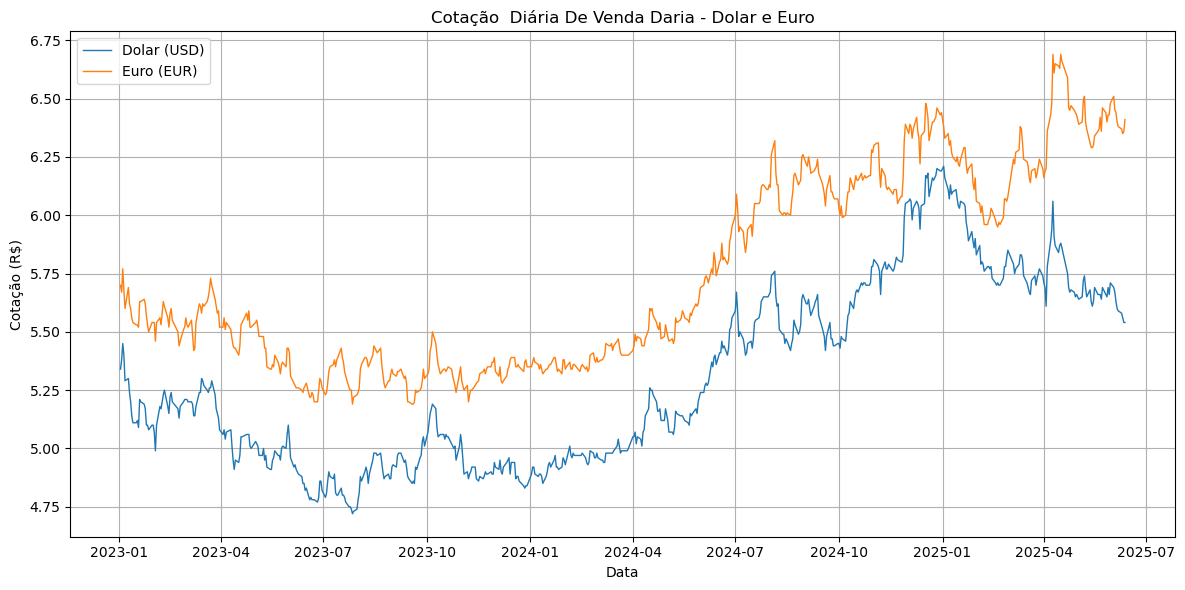

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['dataHoraCotacao'], df['cotacaoVenda_USD'], label='Dolar (USD)', linewidth=1)
plt.plot(df['dataHoraCotacao'], df['cotacaoVenda_EUR'], label='Euro (EUR)', linewidth=1)
plt.title('Cotação  Diária De Venda Daria - Dolar e Euro')
plt.xlabel('Data')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
df

,Unnamed: 0,dataHoraCotacao,tipoBoletim,cotacaoCompra_USD,cotacaoVenda_USD,cotacaoCompra_EUR,cotacaoVenda_EUR,paridadeCompra_USDEUR,paridadeVenda_USDEUR,ano_mes,trimestre,ano
0,0,2023-01-02,Fechamento,5.34,5.34,5.70,5.70,1.07,1.07,2023Q1,2023Q1,2023
1,1,2023-01-03,Fechamento,5.38,5.38,5.67,5.67,1.06,1.06,2023Q1,2023Q1,2023
2,2,2023-01-04,Fechamento,5.45,5.45,5.77,5.77,1.06,1.06,2023Q1,2023Q1,2023
3,3,2023-01-05,Fechamento,5.40,5.40,5.68,5.68,1.05,1.05,2023Q1,2023Q1,2023
4,4,2023-01-06,Fechamento,5.28,5.29,5.60,5.60,1.06,1.06,2023Q1,2023Q1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
611,611,2025-06-06,Fechamento,5.59,5.59,6.37,6.38,1.14,1.14,2025Q2,2025Q2,2025
612,612,2025-06-09,Fechamento,5.58,5.58,6.37,6.37,1.14,1.14,2025Q2,2025Q2,2025
613,613,2025-06-10,Fechamento,5.56,5.56,6.34,6.35,1.14,1.14,2025Q2,2025Q2,2025
614,614,2025-06-11,Fechamento,5.54,5.54,6.36,6.36,1.15,1.15,2025Q2,2025Q2,2025


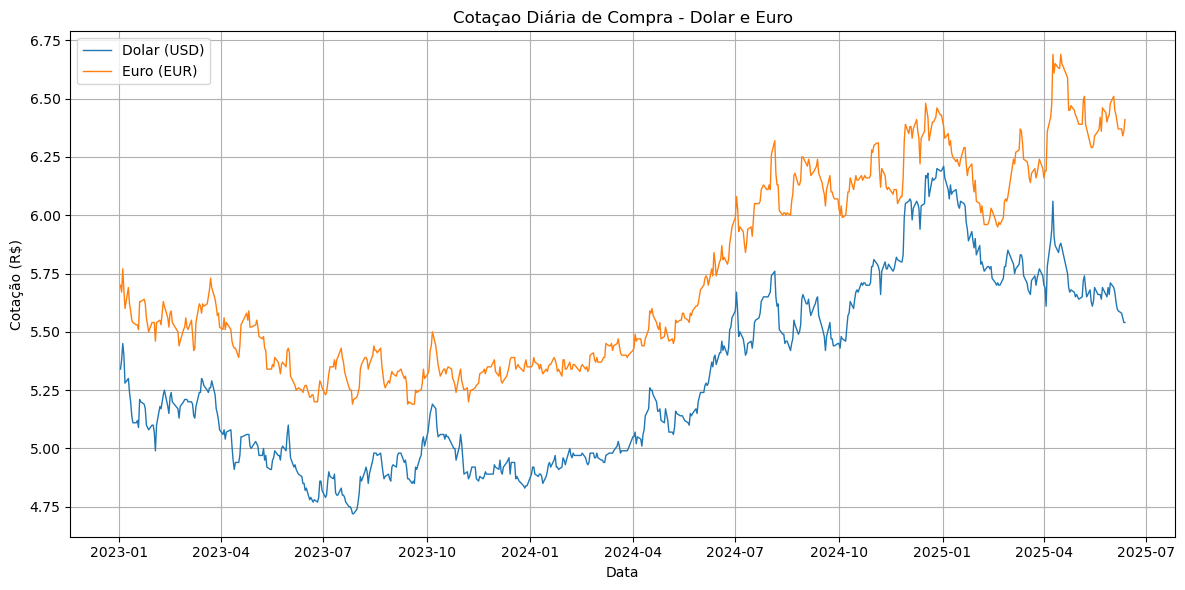

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['dataHoraCotacao'], df['cotacaoCompra_USD'], label='Dolar (USD)', linewidth=1)
plt.plot(df['dataHoraCotacao'], df['cotacaoCompra_EUR'], label='Euro (EUR)', linewidth=1)
plt.title('Cotaçao Diária de Compra - Dolar e Euro')
plt.xlabel('Data')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

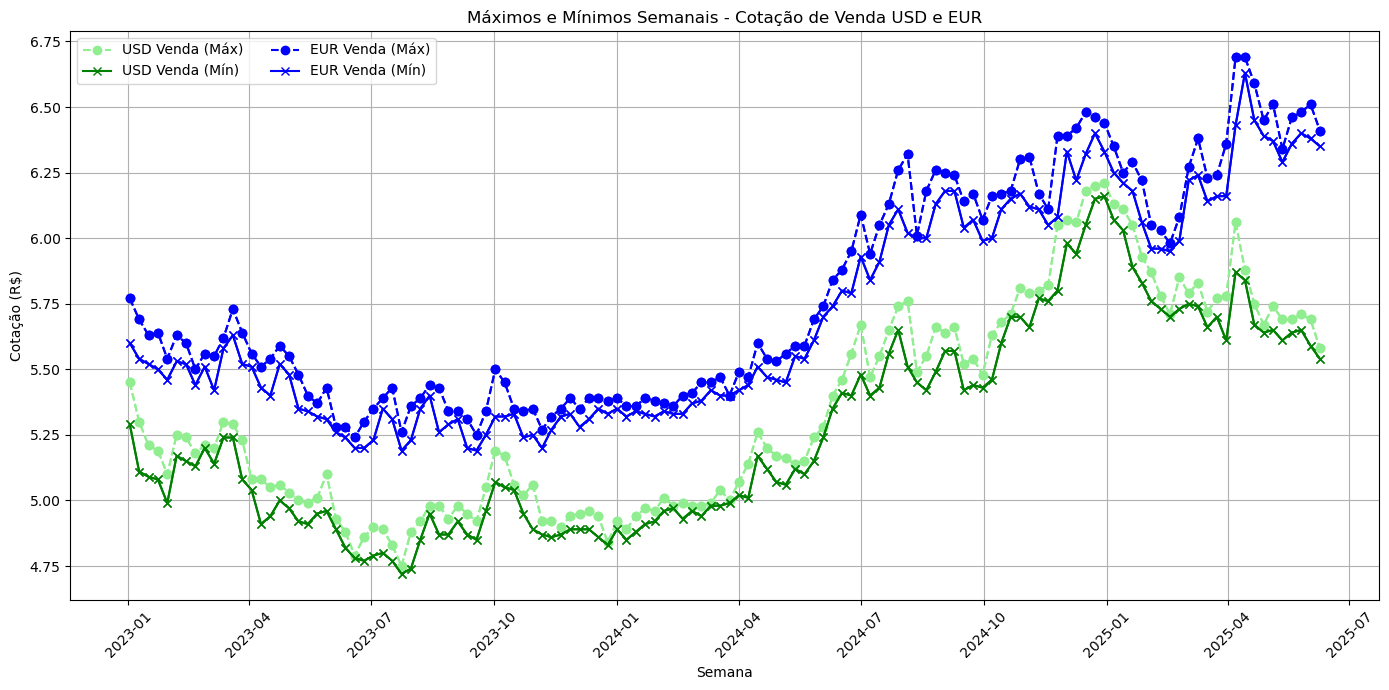

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# === USD ===
plt.plot(
    semana_df['semana'], 
    semana_df['cotacaoVenda_USD_max'], 
    label='USD Venda (Máx)', 
    color='lightgreen', 
    linestyle='--', 
    marker='o'
)

plt.plot(
    semana_df['semana'],  # <<=== faltava isso aqui
    semana_df['cotacaoVenda_USD_min'], 
    label='USD Venda (Mín)', 
    color='green', 
    linestyle='-', 
    marker='x'
)

# === EUR ===
plt.plot(
    semana_df['semana'],  # <<=== aqui também
    semana_df['cotacaoVenda_EUR_max'], 
    label='EUR Venda (Máx)', 
    color='blue', 
    linestyle='--', 
    marker='o'
)

plt.plot(
    semana_df['semana'],  # <<=== e aqui
    semana_df['cotacaoVenda_EUR_min'], 
    label='EUR Venda (Mín)', 
    color='blue', 
    linestyle='-', 
    marker='x'
)

# Remove duplicatas na legenda (opcional, mas seguro)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), ncol=2)

# Finalização
plt.title("Máximos e Mínimos Semanais - Cotação de Venda USD e EUR")
plt.xlabel("Semana")
plt.ylabel("Cotação (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


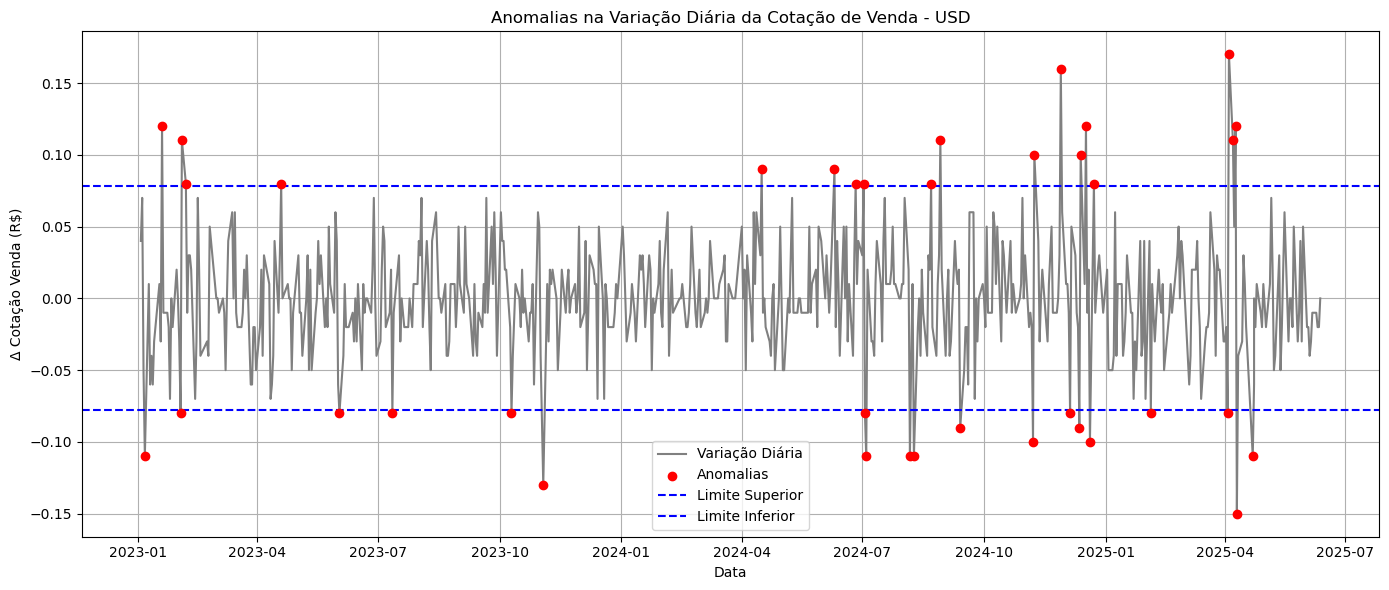

In [32]:
plt.figure(figsize=(14, 6))
plt.plot(df['dataHoraCotacao'], df['variacao_venda'], label='Variação Diária', color='gray')
plt.scatter(anomalias['dataHoraCotacao'], anomalias['variacao_venda'], 
            color='red', label='Anomalias', zorder=5)
plt.axhline(limite_sup, color='blue', linestyle='--', label='Limite Superior')
plt.axhline(limite_inf, color='blue', linestyle='--', label='Limite Inferior')
plt.title('Anomalias na Variação Diária da Cotação de Venda - USD')
plt.xlabel('Data')
plt.ylabel('Δ Cotação Venda (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
df.to_csv('cotacao.csv',sep=';',decimal=',')